# AULA 7 DEMONSTRAÇÃO 1- Autoencders

Aula 7- Aula Assíncrona
> https://www.youtube.com/watch?v=2EBt0sS7kwI&ab_channel=MoacirAntonelliPonti

---

## Autoencoder em pytorch

- utilizar o minist como exemnplo de dataset

---

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Podemos carregar um dataset já existente, utilizando os seguintes parâmetros:
- `root`: caminho onde os dados serão armazenados localmente
- `train`: variável binária que define se carregar os dados de treinamento (`True`) o teste (`False`)
- `download`: se `True` faz download da Internet caso os dados não estejam disponíveis localmente
- `transform` e `target_transform` especifica transformações para as features e labels.

In [45]:
# tranforma imagens em tensores
tensor_transform = transforms.ToTensor()

# Download e carregamento do dataset MNIST
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=tensor_transform)

# Cria um DataLoader para o dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [46]:
class Autoencoder(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # 28*28 = 784 -> 128
            nn.ReLU(),
            nn.Linear(128, 32), # 128 -> 32
            nn.ReLU(),
        ) # saida do encoder: 32
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 128), # 32 -> 128
            nn.ReLU(),
            nn.Linear(128, 28*28), # 128 -> 28*28 = 784
            nn.Sigmoid(), # simoid para normalizar os valores entre 0 e 1
        ) # saida do decoder: 784

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat
    

In [47]:
net = Autoencoder()
print(net)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [48]:
# função custo
loss_function = nn.MSELoss()
optim = torch.optim.Adam(net.parameters(), lr=2e-3, weight_decay=1e-7)

> com os parametros da rede definidos, vamos fazer o treinamento agora

In [49]:
epochs = 10
outputs = []
losses = []

for epoch in range(epochs):
    print(f'{epoch} ', end='')
    for (image, _) in dataloader:
        # como autoencoder é denso, redimensiona as imagens para 1D
        image = image.reshape(-1, 28*28)
        # saída do autoencoder
        reconstructed = net(image)
        # calcula a função custo
        loss = loss_function(reconstructed, image)
        # zera os gradientes
        optim.zero_grad()
        # backpropagation
        loss.backward()
        # atualiza os pesos
        optim.step()
        losses.append(loss)
    
    outputs.append((epoch, image, reconstructed))

0 1 2 3 4 5 6 7 8 9 

In [50]:
# extraindo os valores de MSE para as epocas
losses_val = [l.item() for l in losses]

print(len(losses_val))

18750


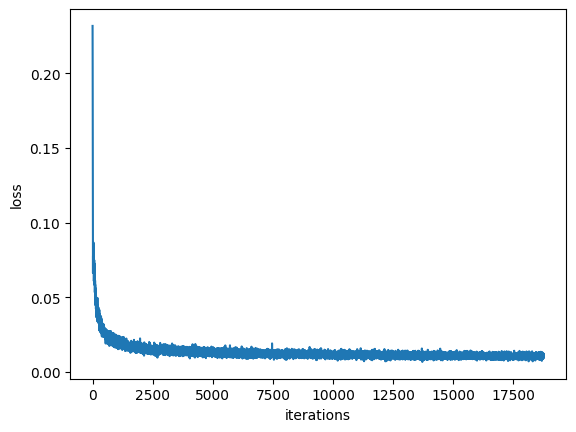

In [51]:
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(losses_val)

> podemos reconstruir as imagens para saber como fica

AttributeError: 'Line2D' object has no property 'cmap'

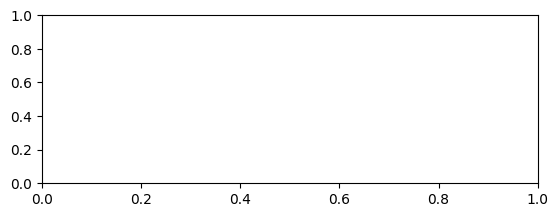

In [52]:
for i, item in enumerate(image):
    item = item.reshape(-1, 28, 28)
    plt.subplot(211)
    plt.imgshow(item[0], cmap='gray')

for i, item in enumerate(reconstructed):
    item = item.reshape(-1, 28, 28)
    plt.subplot(212)
    plt.imgshow(item[0].detach().numpy(), cmap='gray')

> podemos também utilizar APENAS o encoder treinado para obter feautures das iamgens

In [ ]:
features = net.encoder(image)

features[0].detach().numpy()